In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import dump, load

import warnings
warnings.filterwarnings('ignore')

In [2]:
area0 = pd.read_csv("area8.csv")[['segmentid','avg_ratio','avg_capacity','avg_occupied','distance','week','hour']]
area0 = area0.rename(columns={'avg_ratio':'ratio','avg_capacity':'capacity','avg_occupied':'occupied'})
area0 = area0.fillna(0)

In [3]:
features = ['segmentid','ratio','capacity','occupied','distance','week','hour']
for i in range(24):
    features += [str(i+1)]
area = pd.DataFrame(columns=features)
seg_id = pd.unique(area0['segmentid'])
for each in seg_id:
    new_data = area0[area0['segmentid']==each]
    for i in range(24):
        index = -i - 1
        rotate_data = list(new_data['occupied'])[index:] + list(new_data['occupied'])[:index]
        new_data[str(i+1)] = rotate_data
    area = area.append(new_data)
area0 = area
area0['distance'] *= 1000

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
features = ['capacity','distance','week','hour']
for i in range(24):
    features += [str(i+1)]
X = np.array(area0[features])
y = np.array(area0['occupied'])

In [6]:
reg = LinearRegression().fit(X,y)
y_pred = reg.predict(X)
# dump(reg, 'area8.joblib') 

In [7]:
y_pred_ceil = y_pred
diff_ratio = np.zeros(np.shape(y_pred))
for i in range(len(y_pred)):
    if y_pred_ceil[i] > np.array(area0['capacity'])[i]:
        y_pred_ceil[i] = np.array(area0['capacity'])[i]
    if np.array(area0['capacity'])[i] == 0:
        diff_ratio[i] = 0
    else:
        diff_ratio[i] = abs(y_pred_ceil[i] - np.array(area0['occupied'])[i]) / np.array(area0['capacity'])[i]
print('Score: ' + str(reg.score(X,y_pred_ceil)))

Score: 0.9821340908752997


(array([326., 141., 111.,  54.,  25.,  11.,   9.,   3.,   5.,   1.]),
 array([0.        , 0.05136582, 0.10273164, 0.15409746, 0.20546327,
        0.25682909, 0.30819491, 0.35956073, 0.41092655, 0.46229237,
        0.51365818]),
 <a list of 10 Patch objects>)

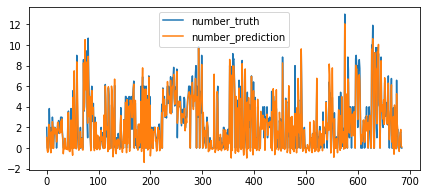

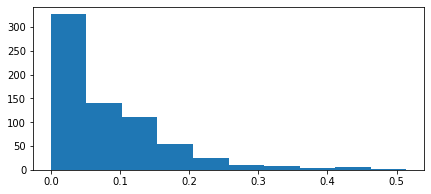

In [9]:
plt.figure(figsize=(7,3))
plt.plot(y[::100], label='number_truth')
plt.plot(y_pred[::100], label='number_prediction')
plt.legend()
plt.figure(figsize=(7,3))
# plt.plot(diff_ratio[::100], label='ratio_difference')
# plt.hlines(np.mean(diff_ratio),0,len(diff_ratio[::100]), label='average_difference' ,colors='red')
# plt.legend()
plt.hist(diff_ratio[::100])

In [9]:
np.mean(diff_ratio)

0.08981307809233884

In [10]:
np.var(diff_ratio)

0.012459343414263961